In [1]:
from tensorflow import keras 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 

In [2]:
# check for hardware available to tensorflow
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.config.experimental.list_logical_devices()

2025-06-17 14:45:51.794983: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-17 14:45:51.795067: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-17 14:45:51.795080: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1750151751.795771 3419034 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1750151751.795869 3419034 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [4]:
# check if tensorflow is built with CUDA
tf.test.is_built_with_cuda()

False

```
Ideally it should show GPU and built in CUDA on windows. Below program is still created...

In [5]:
# load the cifar10 dataset 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train_full.shape

(50000, 32, 32, 3)

In [7]:
X_train_full[0].shape

(32, 32, 3)

In [8]:
y_train_full.shape

(50000, 1)

In [9]:
y_train_full[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
# create a dictionary of index and value using https://keras.io/api/datasets/cifar10/
lookup_values = {
    0 : "Airplane", 
    1 : "Automobile", 
    2 : "Bird",
    3 : "Cat", 
    4 : "Deer", 
    5 : "Dog", 
    6 : "Frog",
    7 : "Horse", 
    8 : "Ship", 
    9 : "Truck"
}

In [11]:
y_train_full[0]

array([6], dtype=uint8)

In [72]:
def plot_image(X_values, y_values):
    plt.figure(figsize=(10, 1))
    plt.imshow(X_values)
    plt.axis("off")
    plt.title(lookup_values.get(y_values[0], "NA"))

In [ ]:
def plot_sample(X, y, index=None): 
    plt.figure(figsize=(10, 1))

    plt.imshow(X[index])
    plt.axis("off")
    plt.title(lookup_values.get(y[index][0], "NA"))


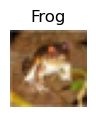

In [61]:
plot_sample(X_train_full, y_train_full, index=0)

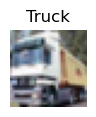

In [62]:
plot_sample(1, X_train_full, y_train_full, index=1)

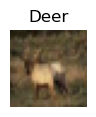

In [63]:
plot_sample(3, X_train_full, y_train_full, index=2)

``` 
Split the training and validation set 

In [16]:
X_train_full.shape

(50000, 32, 32, 3)

In [17]:
X_train, y_train, X_val, y_val = X_train_full[:40000], y_train_full[:40000], X_train_full[40000:], y_train_full[40000:]

In [18]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 32, 32, 3), (40000, 1), (10000, 32, 32, 3), (10000, 1))

```
Scale the image


In [19]:
# now lets scale the dataset; image data will contain data ranging from 0 to 255
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
# divide the values of X_train, X_test, X_val by 255 
X_train_scaled = X_train/255.0
X_val_scaled = X_val/255.0 
X_test_scaled = X_test/255.0
X_train_full_scaled = X_train_full/255.0

X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [21]:
# labels are categorical values - (usually this is not needed for classification task however, you can perform one hot encoding for labels)
def one_hot_encoding_labels(y_labels, num_classes=10): 
    return keras.utils.to_categorical(
        y_labels, num_classes=num_classes
    )

y_train_categorical = one_hot_encoding_labels(y_train, 10)
y_test_categorical = one_hot_encoding_labels(y_test, 10)
y_val_categorical = one_hot_encoding_labels(y_val)
y_train_full_categorical = one_hot_encoding_labels(y_train_full, 10)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

``` 
Build the model 

lets use 2 hidden layer for lines and curves

In [22]:
X_train_scaled.shape

(40000, 32, 32, 3)

In [23]:
y_train_categorical.shape

(40000, 10)

In [31]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
32*32*3

3072

In [33]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(keras.layers.Dense(3000, activation="relu"))
model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
import time 
import os 

def get_run_logdir(root_logdir="tensorboard_logs", name=""):
    run_id = time.strftime(f"{name}_%Y%m%d%H%M%S")
    return os.path.join(root_logdir, run_id)

In [36]:
# Lets create some checkpoints 
FILE_NAME = "output/video17/two_hidden_cifar10.keras"
log_dir = get_run_logdir(name="cifar10_full_training")

# create checkpoints - one to save the best model and another one with early stopping 
early_stopping_chkp = keras.callbacks.EarlyStopping(patience=100,
                                                    restore_best_weights=True)

best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

# create checkpoint for tensorboard 
tensorboard_chkp = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

In [37]:
log_dir

'tensorboard_logs/cifar10_full_training_20250617145151'

```
Below by default is running GPU - Painfully slow on macbook pro and getting vanishing gradient... Accuracy is reduced to 0 and loss increased to more than 130 

In [38]:
# perform fit to the ANN 
model.fit(X_train_full_scaled, y_train_full_categorical, epochs=50, callbacks=[tensorboard_chkp])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2590 - loss: 2.0869
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.3273 - loss: 1.9099
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2875 - loss: 2.3215
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2594 - loss: 3.1341
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2393 - loss: 4.2453
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.2252 - loss: 5.9184
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2189 - loss: 8.2616
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.2127 - loss: 11.3371
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.2000 - loss: 16.2784
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.1883 - loss: 23.6378
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.1745 - loss: 33.9222
Epoc

KeyboardInterrupt: 

``` 
Lets call this using GPU 

In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def get_model():

    model = keras.models.Sequential()

    model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
    model.add(keras.layers.Dense(3000, activation="relu"))
    model.add(keras.layers.Dense(1000, activation="relu"))
    model.add(keras.layers.Dense(10, activation="sigmoid"))

    model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

    return model 

In [170]:
def get_callbacks(location="output", file_name="mymodel.keras", logdir_name="mylog"):
    # Lets create some checkpoints 
    FILE_NAME = f"{location}/{file_name}"
    log_dir = get_run_logdir(name=logdir_name)

    # create checkpoints - one to save the best model and another one with early stopping 
    early_stopping_chkp = keras.callbacks.EarlyStopping(patience=10,
                                                        restore_best_weights=True)

    best_estimator_chkp = keras.callbacks.ModelCheckpoint(FILE_NAME, save_best_only=True)

    # create checkpoint for tensorboard 
    tensorboard_chkp = keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

    return [early_stopping_chkp, best_estimator_chkp, tensorboard_chkp]

In [53]:
%%timeit -n1 -r1
cpu_model=get_model()
with tf.device('/CPU:0'):
    callbacks_chkp = get_callbacks(location="output/video17", file_name="two_hidden_cifar10.keras", logdir_name="cifar10_logs")
    cpu_model.fit(X_train_scaled, y_train_categorical, validation_data=(X_val_scaled, y_val_categorical), epochs=50, callbacks=callbacks_chkp)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.2951 - loss: 1.9567 - val_accuracy: 0.3914 - val_loss: 1.7340
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.4121 - loss: 1.6735 - val_accuracy: 0.4174 - val_loss: 1.6541
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.4438 - loss: 1.5826 - val_accuracy: 0.4331 - val_loss: 1.6059
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.4663 - loss: 1.5196 - val_accuracy: 0.4401 - val_loss: 1.5715
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.4818 - loss: 1.4677 - val_accuracy: 0.4535 - val_loss: 1.5422
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4967 - loss: 1.4226 - val_accuracy: 0.4616 - val_loss: 1.5186
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.5135 - loss: 1.3814 - val_accuracy: 0.4708 - val_loss: 1.4971
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.5253 -

In [42]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model()
    gpu_model.fit(X_train_full_scaled, y_train_full_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2630 - loss: 2.0864
23.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


```
Verdict - My macbook GPU is not that strong... CPU is taking 19s however GPU is taking 23.6s. CUDA is not available for macos 

```
Use the CPU model for predictions 


In [54]:
# evaluate the model
best_model = keras.models.load_model('output/video17/two_hidden_cifar10.keras')

In [55]:
best_model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2817 - loss: 4.8399


[4.87303352355957, 0.27480000257492065]

In [74]:
np.argmax(best_model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.int64(3)

In [75]:
y_test[0]

array([3], dtype=uint8)

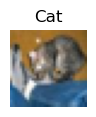

In [77]:
plot_image(X_test[0], y_test[0])


# Lets Classify Keras MNIST Fashion dataset 

In [190]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [191]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [192]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

```
This is 2D image dataset

In [193]:
y_train_full[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [194]:
# create lookup values for this dataset lables 
fashion_lookup = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot',
}

In [195]:
def create_image(X_value, y_value): 
    plt.figure(figsize=(2,1))
    plt.axis("off")
    plt.imshow(X_value, cmap="binary")
    plt.title(fashion_lookup.get(y_value, "NA"))

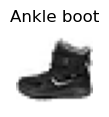

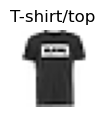

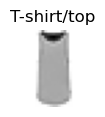

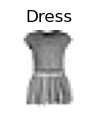

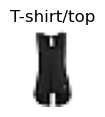

In [196]:
for i in range (0, 5) :
    create_image(X_train_full[i], y_train_full[i])

In [197]:
# split the train and validation set 
X_train, X_val, y_train, y_val = X_train_full[5000:], X_train_full[:5000], y_train_full[5000:], y_train_full[:5000]

In [198]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((55000, 28, 28), (5000, 28, 28), (55000,), (5000,))

In [199]:
# scale the input images between 0 and 255 
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0 
X_val_scaled = X_val/255.0 
X_train_full_scaled = X_train_full/255.0 

In [200]:
# convert the output using one hot encoding technique 
y_train_scaled = keras.utils.to_categorical(y_train, 10)
y_test_scaled = keras.utils.to_categorical(y_test, 10)
y_val_scaled = keras.utils.to_categorical(y_val, 10)
y_train_full_scaled = keras.utils.to_categorical(y_train_full)

In [228]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [229]:
28*28

784

In [230]:
# create model to perform data classification. 
model = keras.models.Sequential() 

# add layers 
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

# compile the model 
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [231]:
# create model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,810 (1.25 MB)

 Trainable params: 328,810 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [232]:
# lets create some checkpoints
callbacks_chkp = get_callbacks("output/video17", "fashion_mnist_2_hidden_layer.keras", "fashion_mnist")

In [233]:
# train the model using CPU (for mac only)
history = None
with tf.device('/CPU:0'):
    histroy=model.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=100, callbacks=callbacks_chkp)


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6922 - loss: 0.9851 - val_accuracy: 0.8286 - val_loss: 0.5099
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8264 - loss: 0.4997 - val_accuracy: 0.8472 - val_loss: 0.4470
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8427 - loss: 0.4476 - val_accuracy: 0.8582 - val_loss: 0.4153
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8530 - loss: 0.4181 - val_accuracy: 0.8604 - val_loss: 0.3944
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8603 - loss: 0.3966 - val_accuracy: 0.8656 - val_loss: 0.3794
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8647 - loss: 0.3799 - val_accuracy: 0.8708 - val_loss: 0.3675
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8686 - loss: 0.3663 - val_accuracy: 0.8718 - val_loss: 0.3587
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8722 - loss: 0

In [234]:
model.layers[2]

<Dense name=dense_1, built=True>

In [235]:
model.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6819 - loss: 1.6394


[1.6971999406814575, 0.6807000041007996]

In [236]:
# looks like overfitting - get the best model 
best_model = keras.models.load_model("output/video17/fashion_mnist_2_hidden_layer.keras")
best_model.evaluate(X_test_scaled, y_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6819 - loss: 1.6394


[1.6971999406814575, 0.6807000041007996]

In [237]:
y_pred = best_model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [238]:
y_pred[0]

array([5.9179212e-07, 1.9245101e-06, 2.7813751e-01, 3.2046242e-03,
       3.9331299e-01, 9.5931804e-01, 6.9608116e-01, 9.9997628e-01,
       9.6092469e-01, 9.9999952e-01], dtype=float32)

Ankle boot


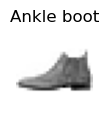

In [239]:
create_image(X_test_scaled[0], np.argmax(y_pred[0]))
print(fashion_lookup.get(y_test[0], "na"))

In [240]:
# create a confusion matrix 
cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in y_pred])

In [241]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[488,   6,  52, 188,   9,   0, 225,   4,  23,   5],
       [  0, 914,  14,  65,   1,   0,   0,   0,   2,   4],
       [  6,   2, 859,  20,  69,   0,  24,   1,  10,   9],
       [  2,   6,  28, 926,   8,   0,  16,   2,   7,   5],
       [  0,   0, 540, 107, 339,   0,   6,   1,   4,   3],
       [  1,   0,   0,   2,   2, 489,   1, 296,  12, 197],
       [ 48,   1, 271, 129, 287,   0, 222,   1,  33,   8],
       [  0,   0,   0,   0,   0,   0,   0, 980,   0,  20],
       [  1,   1,  29,  29,   3,   1,  15,  13, 904,   4],
       [  0,   0,   0,   0,   0,   2,   1, 307,   4, 686]], dtype=int32)>

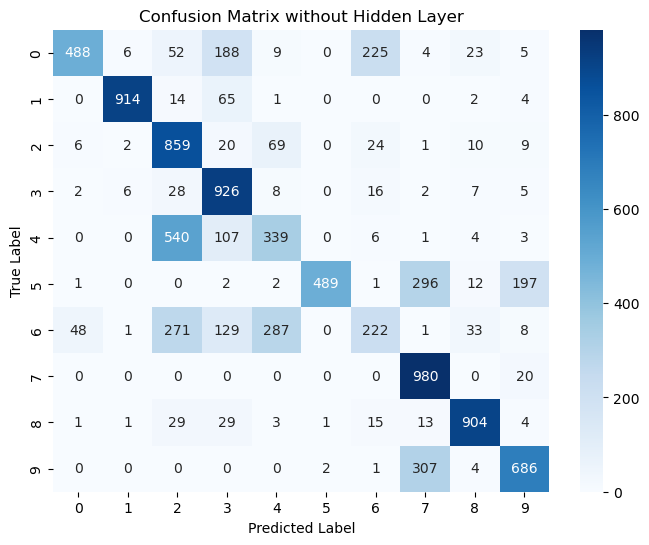

In [242]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix without Hidden Layer')
plt.show()



In [243]:
fashion_lookup

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [251]:
coat_indexes = np.where(y_train==4)

In [255]:
coat_indexes[0][:10]

array([  0,   6,   7,   9,  16,  22,  26,  42,  66, 106])

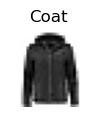

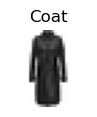

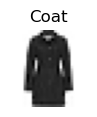

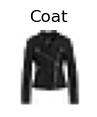

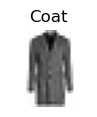

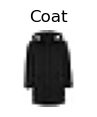

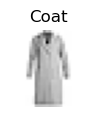

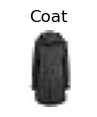

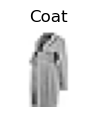

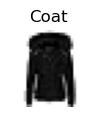

In [257]:
for i in coat_indexes[0][:10]:
    create_image(X_train[i], y_train[i])